In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:

my_data = pd.read_csv('/kaggle/input/dog-breeds-traits-todd-csv/dog_breeds_traits.csv')


In [6]:
my_data.head()

,breed,size,energy_level,friendliness,trainability,shedding,barking,lifespan,origin_country,breed_group
0,Labrador Retriever,large,5,5,5,3,3,12,Canada,sporting
1,Chihuahua,small,4,3,2,2,5,14,Mexico,toy
2,German Shepherd,large,5,4,5,4,4,10,Germany,herding
3,Beagle,medium,4,5,3,3,5,13,England,hound
4,Poodle (Standard),medium,3,5,5,2,2,14,Germany/France,non-sporting


In [7]:
print('Data Types:')
print(my_data.dtypes)

print('\nMissing Values:')
print(my_data.isnull().sum())

Data Types:
breed             object
size              object
energy_level       int64
friendliness       int64
trainability       int64
shedding           int64
barking            int64
lifespan           int64
origin_country    object
breed_group       object
dtype: object

Missing Values:
breed             0
size              0
energy_level      0
friendliness      0
trainability      0
shedding          0
barking           0
lifespan          0
origin_country    0
breed_group       0
dtype: int64


In [49]:
corr = my_data[['energy_level', 'friendliness', 'trainability', 'barking', 'lifespan', 'shedding']].corr()

print(corr)

              energy_level  friendliness  trainability   barking  lifespan  \
energy_level      1.000000     -0.054153      0.587400  0.430571 -0.029264   
friendliness     -0.054153      1.000000      0.379267 -0.433691  0.131007   
trainability      0.587400      0.379267      1.000000 -0.229182 -0.068319   
barking           0.430571     -0.433691     -0.229182  1.000000  0.247388   
lifespan         -0.029264      0.131007     -0.068319  0.247388  1.000000   
shedding          0.410066     -0.196684     -0.016411  0.390959 -0.442870   

              shedding  
energy_level  0.410066  
friendliness -0.196684  
trainability -0.016411  
barking       0.390959  
lifespan     -0.442870  
shedding      1.000000  


In [8]:
print(my_data.describe())

       energy_level  friendliness  trainability   shedding    barking  \
count     20.000000     20.000000     20.000000  20.000000  20.000000   
mean       3.600000      4.400000      3.750000   2.750000   3.250000   
std        1.142481      0.680557      1.019546   0.786398   1.069924   
min        2.000000      3.000000      2.000000   1.000000   2.000000   
25%        3.000000      4.000000      3.000000   2.000000   2.000000   
50%        3.500000      4.500000      4.000000   3.000000   3.000000   
75%        5.000000      5.000000      5.000000   3.000000   4.000000   
max        5.000000      5.000000      5.000000   4.000000   5.000000   

        lifespan  
count  20.000000  
mean   12.100000  
std     1.889026  
min     8.000000  
25%    10.750000  
50%    12.500000  
75%    13.250000  
max    15.000000  


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


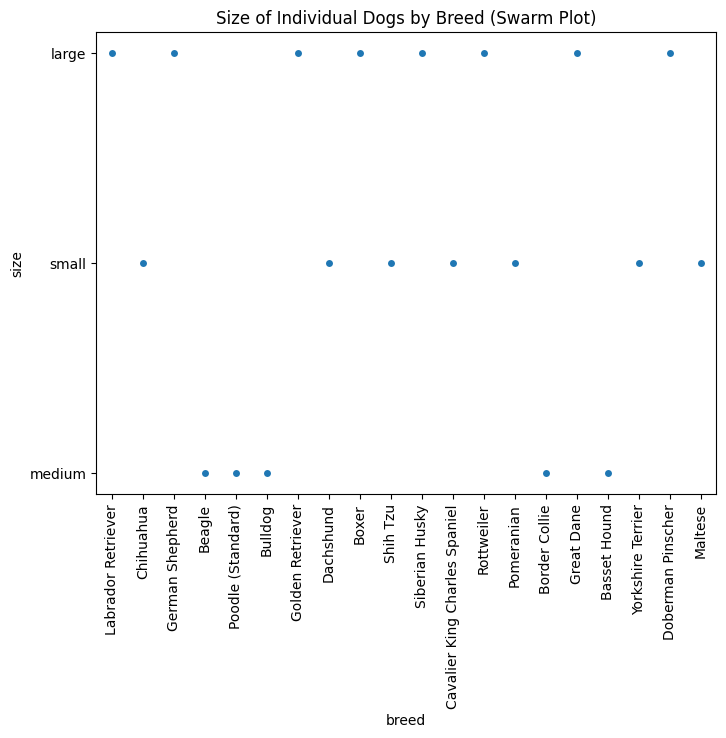

In [30]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x ='breed', y ='size', data=my_data)
plt.title('Size of Individual Dogs by Breed (Swarm Plot)')
plt.xlabel('breed')
plt.ylabel('size')
plt.xticks(rotation=90)
plt.show()

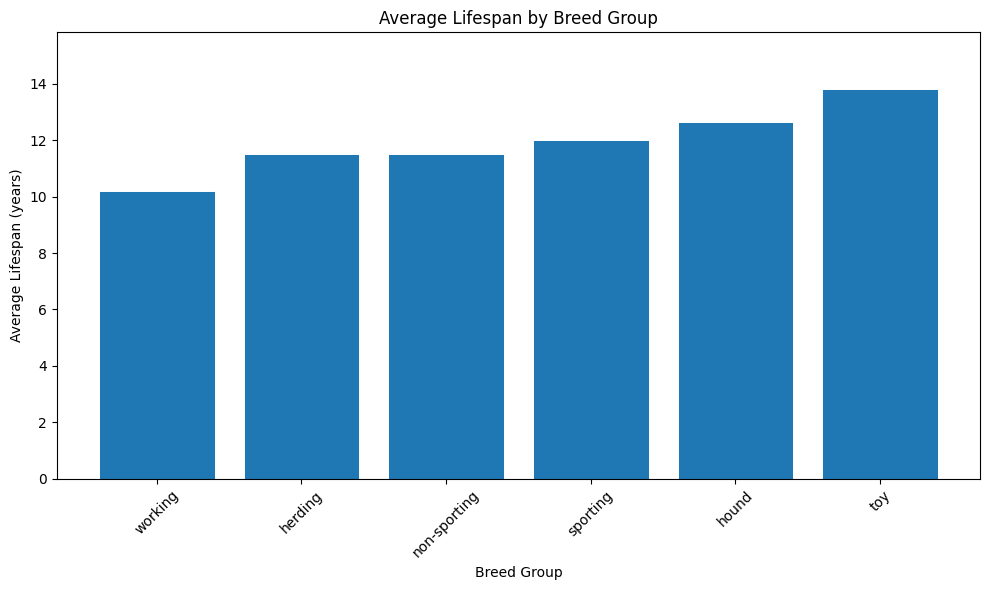

In [36]:

# Aggregate average lifespan by breed group
grouped = my_data.groupby('breed_group')['lifespan'].mean().sort_values()

fig, ax = plt.subplots(figsize=(10, 6))  # Optional: set figure size

ax.bar(grouped.index, grouped.values, edgecolor="white", linewidth=0.7)

ax.set_ylabel('Average Lifespan (years)')
ax.set_xlabel('Breed Group')
ax.set_title('Average Lifespan by Breed Group')
ax.set_ylim(0, grouped.values.max() + 2)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


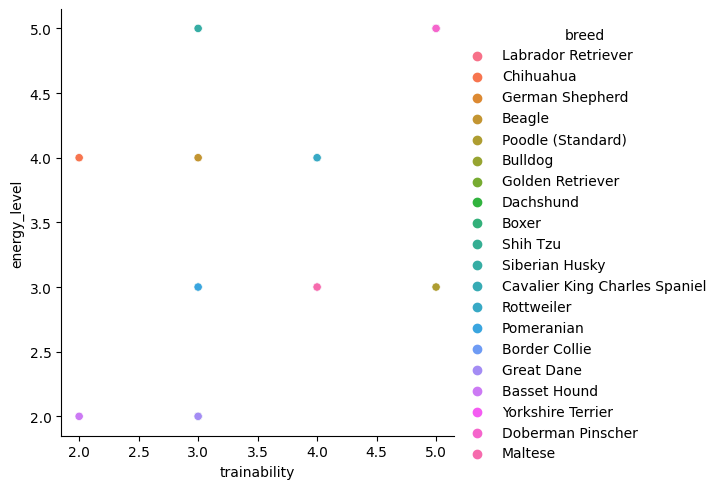

In [43]:
sns.relplot(data=my_data, x="trainability", y="energy_level", hue="breed")